In [1]:
# import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

# need this to display plots in jupyter notebook
%matplotlib notebook

In [2]:
# create some arbitrary data
t = np.linspace(0, 20, 100)
x = np.sin(np.pi/5 * t)
y = np.cos(np.pi/7 * t)
z = np.linspace(0, 100, 100)

# construct array for test data
dataSet = np.array([x, y, z])
n_points = len(t)

In [2]:
# this is the function used in the FuncAnimation function
def animate_func(num):
    
    # clear current figure
    ax.clear()     
    
    # update the data for the line, use num+1 bc Python indexing
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], dataSet[2, :num+1], c='blue')
    
    # add a point for the current particle point
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], c='blue', marker='o')
    
    # add a point for the particle start point
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0], c='black', marker='o')    # Setting Axes Limits
    ax.set_xlim3d([-1, 1])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([0, 100])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num], decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [3]:
def animate():
    
    # Plotting the Animation
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    line_ani = animation.FuncAnimation(fig, animate_func, interval=100,   
                                       frames=n_points)
    plt.show()

In [ ]:
# Saving the Animation
f = r"c://Users/(Insert User)/Desktop/animate_func.gif"
writergif = animation.PillowWriter(fps=numDataPoints/6)
line_ani.save(f, writer=writergif)

<IPython.core.display.Javascript object>


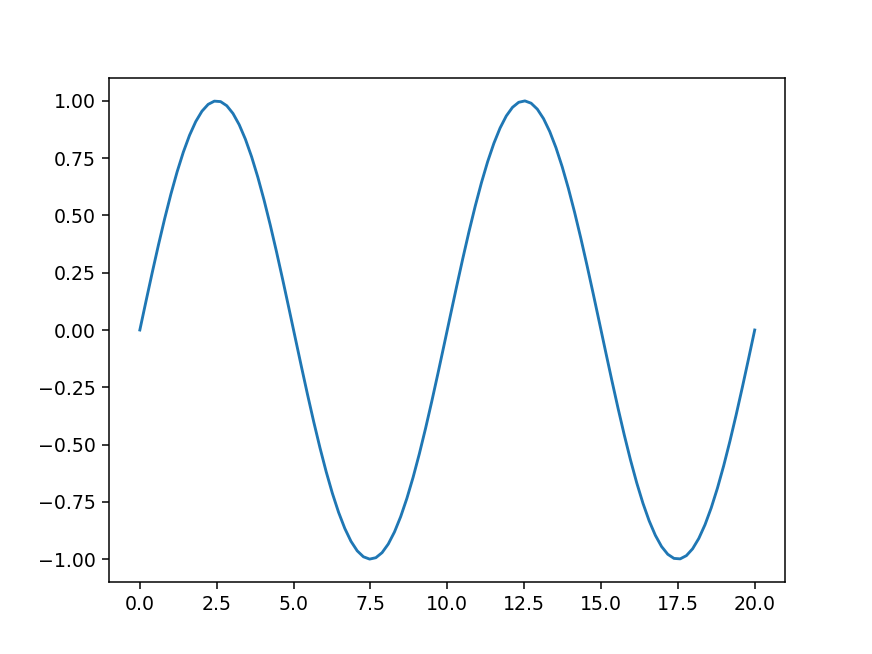

In [8]:
plt.plot(t,x)

In [54]:
def polar2cart(r, theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    
    return x,y
    

# create some arbitrary data
# define time
t = np.linspace(0, 20, 100)
n_t = len(t)

# define the angle for a circle
theta = np.linspace(0, 2*np.pi, 100)
n_points = len(theta)

# fill unused dimensions for plotting
zeros = np.zeros(100)

# define a large circle in xy plane
xy_circ = np.zeros((n_points,n_points,n_points,n_t))
x,y = polar2cart(2, theta)
xy_circ[:,0,0,0] = x
xy_circ[0,:,0,0] = y
xy_circ[0,0,0,0] = x[0]
xy_circ[0,0,0,0] = y[0]



# define a smaller circle in yz plane
yz_circ = np.zeros((n_points,n_points,n_points,n_t))
yz_circ[0,:,0,0], yz_circ[0,0,:,0] = polar2cart(1, theta)

# yz_circ = np.cos(np.pi/7 * t)
# z = np.linspace(0, 100, 100)

# # construct array for test data
# dataSet = np.array([x, y, z])
# n_points = len(t)

In [51]:
np.shape(xy_circ)

(100, 100, 100, 100)

In [53]:
x,y = polar2cart(2, theta)
print(x)
xy_circ[:,0,0,0]

[ 2.          1.99597335  1.98390963  1.96385739  1.9358974   1.90014224
  1.85673587  1.80585308  1.74769875  1.68250707  1.61054052  1.53208889
  1.44746808  1.35701882  1.26110533  1.16011382  1.05445094  0.94454215
  0.83083003  0.71377244  0.59384075  0.47151787  0.34729636  0.2216764
  0.09516383 -0.03173193 -0.15849991 -0.28462968 -0.40961334 -0.53294763
 -0.65413593 -0.77269025 -0.88813323 -1.         -1.10784013 -1.21121937
 -1.30972147 -1.40294978 -1.4905289  -1.57210619 -1.64735316 -1.71596683
 -1.7776709  -1.83221691 -1.87938524 -1.91898595 -1.95085957 -1.97487778
 -1.99094385 -1.99899308 -1.99899308 -1.99094385 -1.97487778 -1.95085957
 -1.91898595 -1.87938524 -1.83221691 -1.7776709  -1.71596683 -1.64735316
 -1.57210619 -1.4905289  -1.40294978 -1.30972147 -1.21121937 -1.10784013
 -1.         -0.88813323 -0.77269025 -0.65413593 -0.53294763 -0.40961334
 -0.28462968 -0.15849991 -0.03173193  0.09516383  0.2216764   0.34729636
  0.47151787  0.59384075  0.71377244  0.83083003  0.

array([ 2.        ,  1.99597335,  1.98390963,  1.96385739,  1.9358974 ,
        1.90014224,  1.85673587,  1.80585308,  1.74769875,  1.68250707,
        1.61054052,  1.53208889,  1.44746808,  1.35701882,  1.26110533,
        1.16011382,  1.05445094,  0.94454215,  0.83083003,  0.71377244,
        0.59384075,  0.47151787,  0.34729636,  0.2216764 ,  0.09516383,
       -0.03173193, -0.15849991, -0.28462968, -0.40961334, -0.53294763,
       -0.65413593, -0.77269025, -0.88813323, -1.        , -1.10784013,
       -1.21121937, -1.30972147, -1.40294978, -1.4905289 , -1.57210619,
       -1.64735316, -1.71596683, -1.7776709 , -1.83221691, -1.87938524,
       -1.91898595, -1.95085957, -1.97487778, -1.99094385, -1.99899308,
       -1.99899308, -1.99094385, -1.97487778, -1.95085957, -1.91898595,
       -1.87938524, -1.83221691, -1.7776709 , -1.71596683, -1.64735316,
       -1.57210619, -1.4905289 , -1.40294978, -1.30972147, -1.21121937,
       -1.10784013, -1.        , -0.88813323, -0.77269025, -0.65

<IPython.core.display.Javascript object>


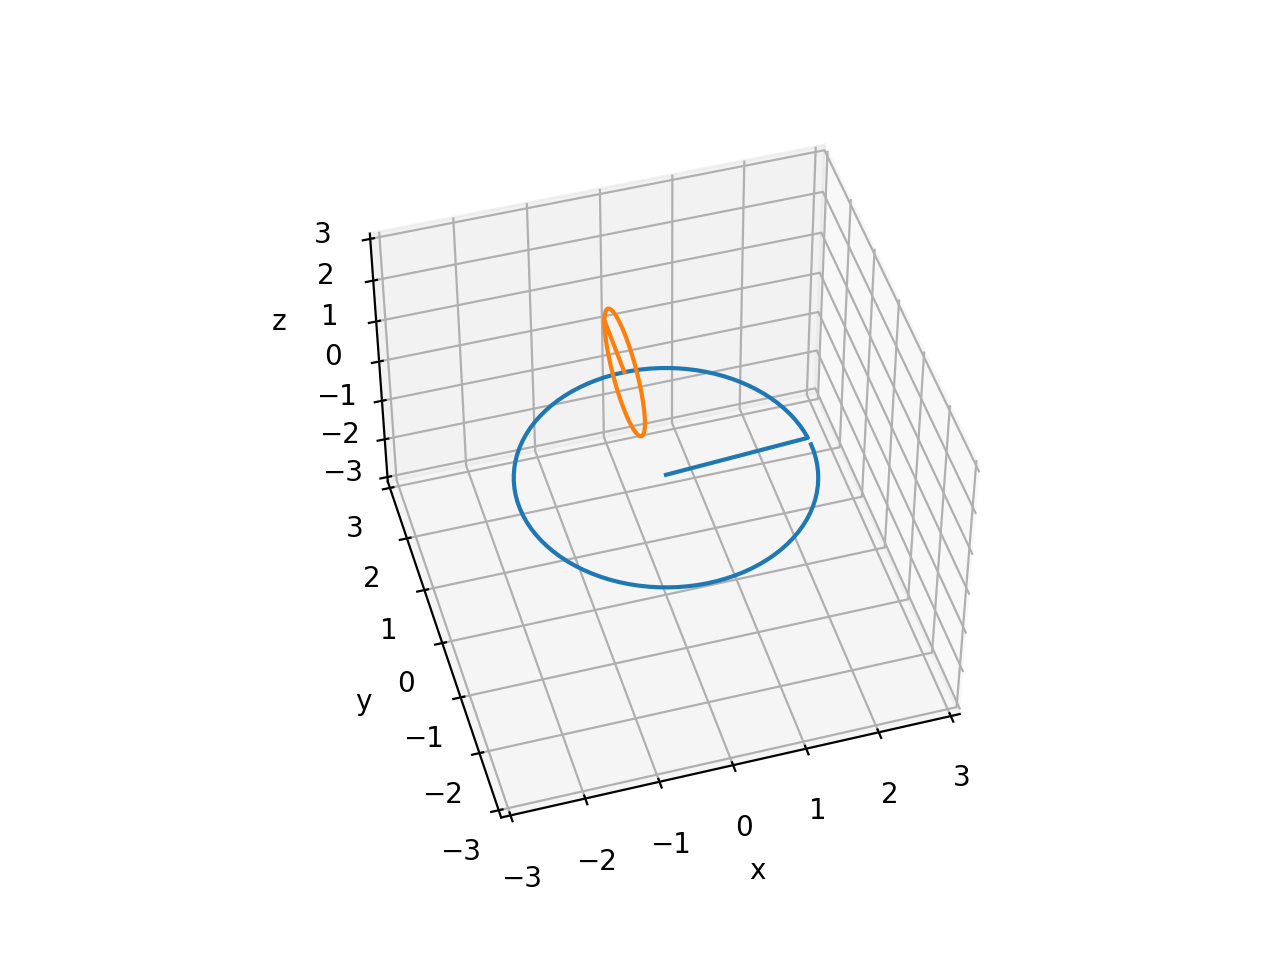

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xy_circ[:,0,0,0],xy_circ[0,:,0,0],xy_circ[0,0,:,0])
ax.plot3D(yz_circ[:,0,0,0],yz_circ[0,:,0,0]+2, yz_circ[0,0,:,0])
ax.set_xlim3d([-3, 3])
ax.set_ylim3d([-3, 3])
ax.set_zlim3d([-3, 3])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [16]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(dataSet[0, 0:10], dataSet[1, 0:10], dataSet[2, 0:10], c='black', marker='o')
plt.show()

<IPython.core.display.Javascript object>